In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
import math


In [18]:
data_x = []
data_y = []
N = 400
prior = [0.5, 0.5]
l_1 = 0

mu_x = [0, 0]
variance_x = [[1, 0], [0, 1]]

mu_y = [3,3]
variance_y = [[1, 0], [0, 1]]



In [19]:
#generating sample and checking for prior values
for i in range(N):
    if np.random.uniform(0, 1, 1) <= prior[0]:
        l_1 = l_1 + 1

l_2 = N - l_1
        

In [20]:
#generating data according to for label x
z = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], l_1)
for i in range(l_1):
    data_x.append(np.matmul(sqrtm(variance_x),z[i, :]) + mu_x)

z = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], l_2)
for i in range(l_2):
    data_y.append(np.matmul(sqrtm(variance_y),z[i, :]) + mu_y)    


In [21]:
def normal_prob(x, m, v):
    x_t = x
    m_t = m
    np.reshape(x, (2,1))
    np.reshape(m, (2,1))
    p = math.exp(-0.5*np.matmul(np.matmul((x_t-m_t), np.linalg.inv(v)), (x-m)))/(2*math.pi*np.linalg.det(v))
    return p

In [22]:
x_right = []
x_error = []
y_right = []
y_error = []

for i in range(l_1):
    p_1 = normal_prob(np.array(data_x)[i, :], mu_x, variance_x)
    p_2 = normal_prob(np.array(data_x)[i, :], mu_y, variance_y)
    if (p_1*prior[0] > p_2*prior[1]):
        x_right.append(np.array(data_x)[i, :])
    else:
        x_error.append(np.array(data_x)[i, :])
        
for i in range(l_2):
    p_1 = normal_prob(np.array(data_y)[i, :], mu_x, variance_x)
    p_2 = normal_prob(np.array(data_y)[i, :], mu_y, variance_y)
    if (p_1*prior[0] < p_2*prior[1]):
        y_right.append(np.array(data_y)[i, :])
    else:
        y_error.append(np.array(data_y)[i, :])

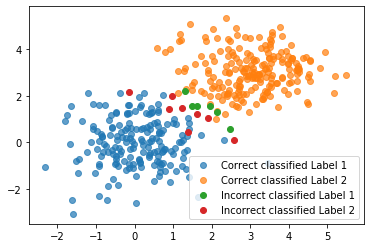

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(x_right)[:, 0], np.array(x_right)[:, 1], alpha=0.7, label='Correct classified Label 1')
ax.scatter(np.array(y_right)[:, 0], np.array(y_right)[:, 1], alpha=0.7, label='Correct classified Label 2')
ax.scatter(np.array(x_error)[:, 0], np.array(x_error)[:, 1], alpha=1, label='Incorrect classified Label 1')
ax.scatter(np.array(y_error)[:, 0], np.array(y_error)[:, 1], alpha=1, label='Incorrect classified Label 2')
ax.legend()
plt.show()

In [26]:
print("The error probability is {}.".format((len(x_error) + len(y_error))/400))

The error probability is 0.035.
